In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from fcmeans import FCM
import warnings

In [2]:
data=pd.read_csv('wine-clustering.csv')
data=data[['Alcohol','Magnesium']]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Alcohol    178 non-null    float64
 1   Magnesium  178 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.9 KB


In [4]:
data.describe()

,Alcohol,Magnesium
count,178.000000,178.000000
mean,13.000618,99.741573
std,0.811827,14.282484
min,11.030000,70.000000
25%,12.362500,88.000000
50%,13.050000,98.000000
75%,13.677500,107.000000
max,14.830000,162.000000


In [5]:
print('Is there any missing values',data.isnull().sum().any())

Is there any missing values False


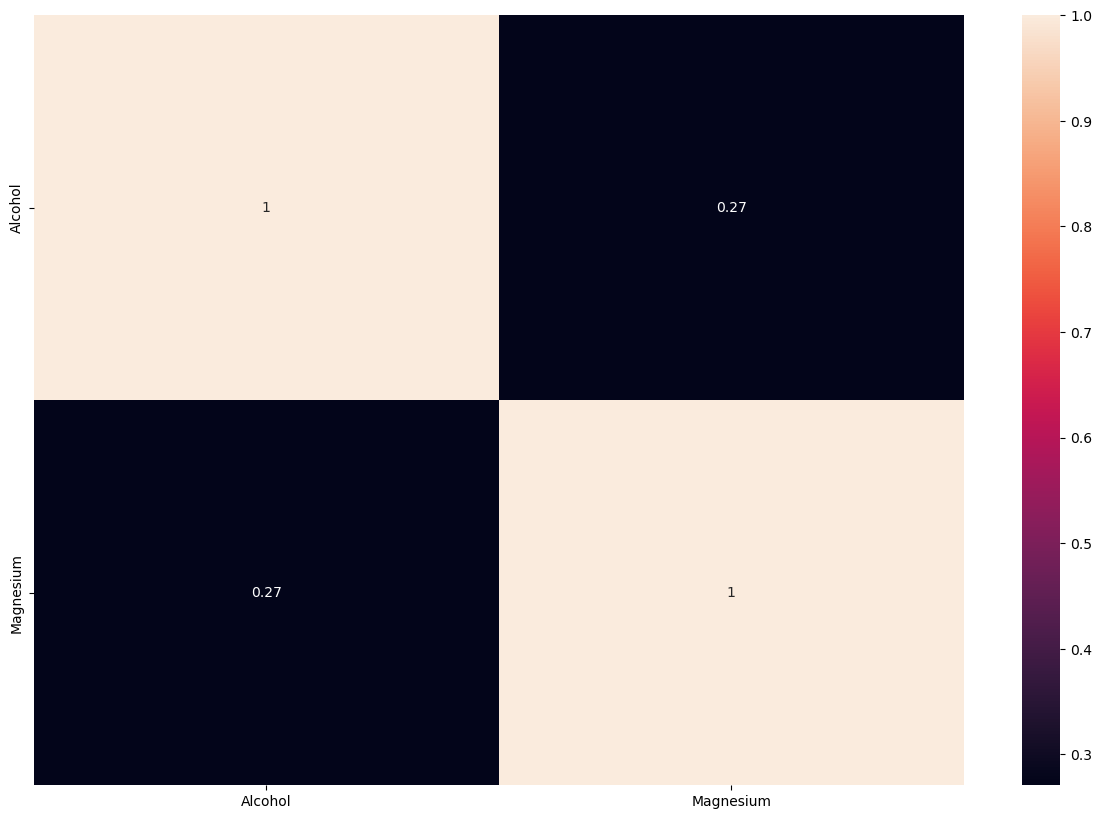

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

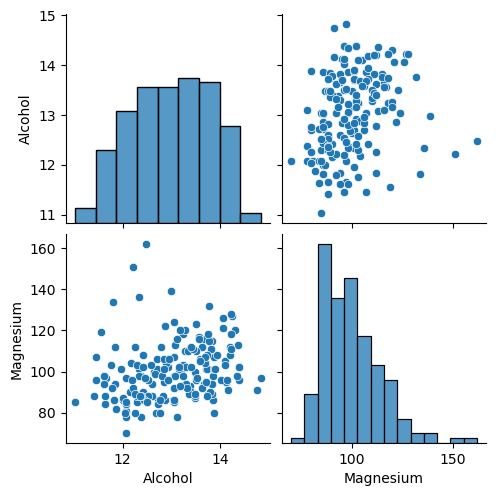

In [7]:
ax = sns.pairplot(data[data.columns])

In [8]:
st=StandardScaler()
data=st.fit_transform(data)

In [9]:
fcmean=FCM(n_clusters=3)
fcmean.fit(data)

In [10]:
cnt=fcmean.centers

In [11]:
cnt

array([[ 0.67231759, -0.2278384 ],
       [-0.96738512, -0.67601101],
       [ 0.61287735,  1.16604892]])

In [20]:
pred=fcmean.predict(data)


In [21]:
fcm_labels=fcmean.u.argmax()

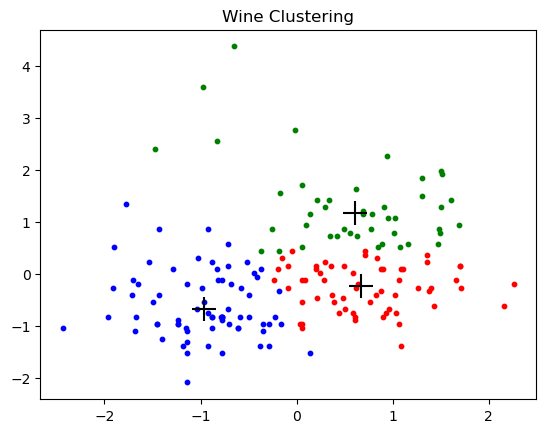

In [24]:
plt.scatter(data[pred == 0, 0], data[pred == 0, 1], s = 10, c = 'r')
plt.scatter(data[pred == 1, 0], data[pred == 1, 1], s = 10, c = 'b' )
plt.scatter(data[pred == 2, 0], data[pred == 2, 1], s = 10, c = 'g' )
plt.scatter(cnt[:, 0], cnt[:, 1], s = 300, c = 'black',marker = '+')
plt.title('Wine Clustering')
plt.show()